In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

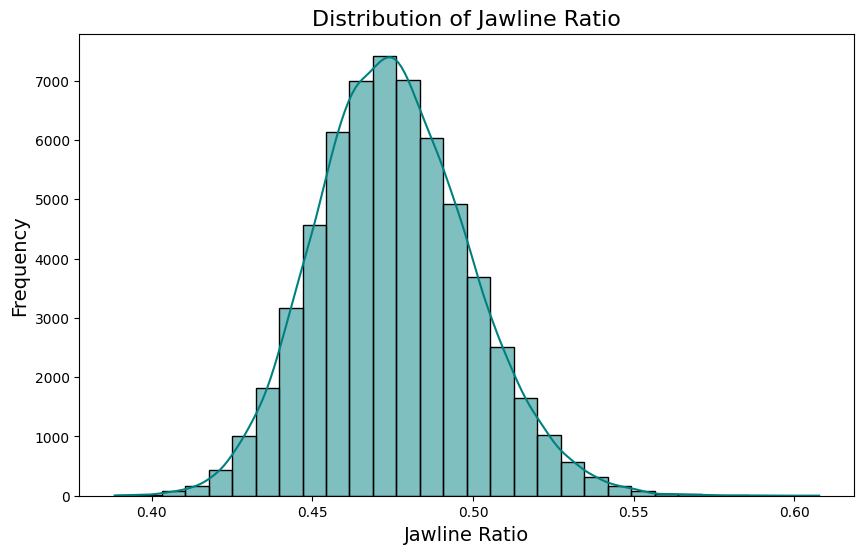

In [16]:
data = pd.read_csv('face_feature_BMI.csv')
data
plt.figure(figsize=(10, 6))
sns.histplot(data['jawline_ratio'], kde=True, color='teal', bins=30)
plt.title('Distribution of Jawline Ratio', fontsize=16)
plt.xlabel('Jawline Ratio', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.show()


In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

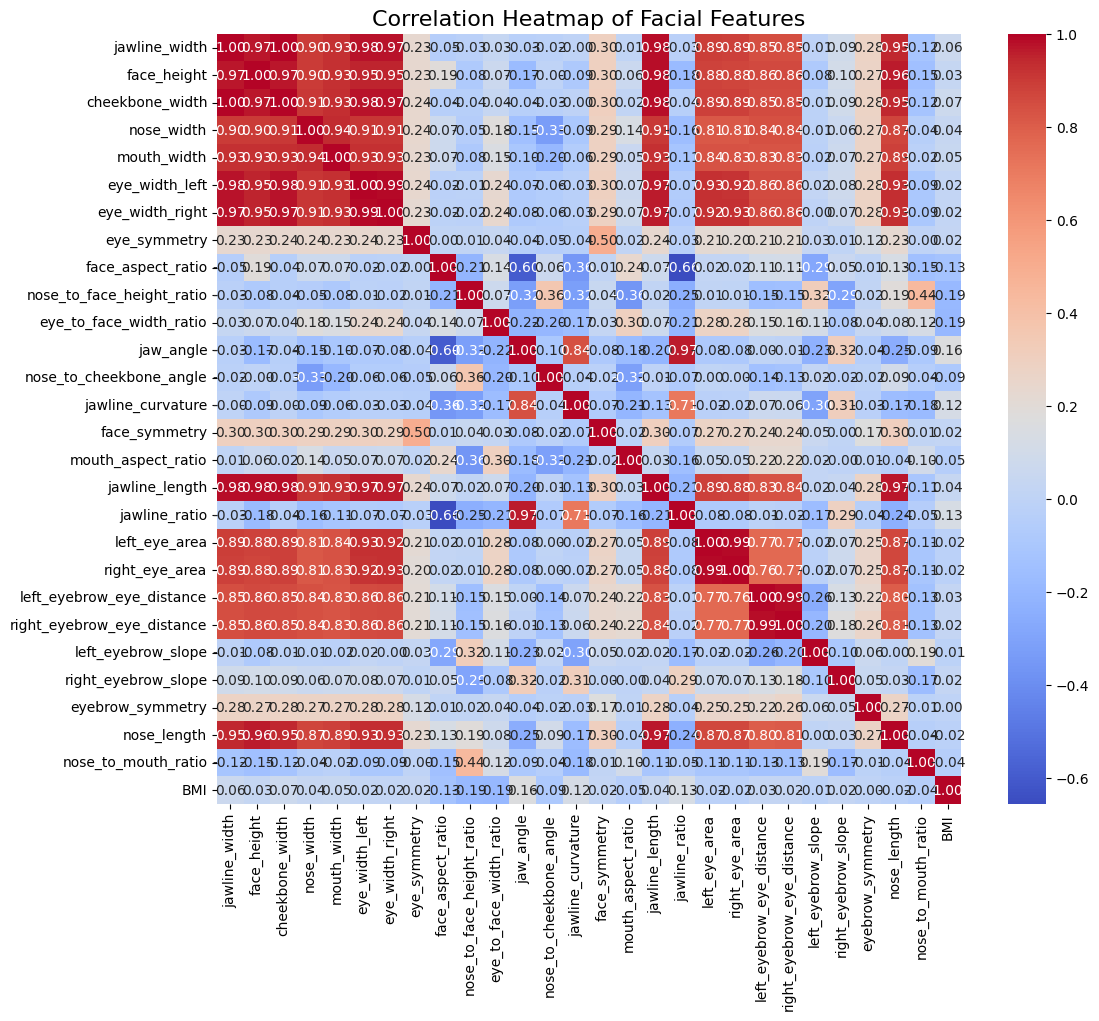

In [15]:
plt.figure(figsize=(12, 10))
sns.heatmap(data.drop(columns = ['Sex']).corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Facial Features', fontsize=16)
plt.show()


In [3]:
# Separate features (X) and target variable (y)
data.dropna(inplace=True)
data = data.drop(data.columns[0], axis=1)
X = data.drop(columns=['BMI','Sex'])  # Replace 'BMI' with the actual BMI column name
y = data['BMI']


In [4]:
# 80-20 split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.columns)

Index(['jawline_width', 'face_height', 'cheekbone_width', 'nose_width',
       'mouth_width', 'eye_width_left', 'eye_width_right', 'eye_symmetry',
       'face_aspect_ratio', 'nose_to_face_height_ratio',
       'eye_to_face_width_ratio', 'jaw_angle', 'nose_to_cheekbone_angle',
       'jawline_curvature', 'face_symmetry', 'mouth_aspect_ratio',
       'jawline_length', 'jawline_ratio', 'left_eye_area', 'right_eye_area',
       'left_eyebrow_eye_distance', 'right_eyebrow_eye_distance',
       'left_eyebrow_slope', 'right_eyebrow_slope', 'eyebrow_symmetry',
       'nose_length', 'nose_to_mouth_ratio'],
      dtype='object')


In [5]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Baseline R^2:", r2_score(y_test, y_pred))
print("Baseline MSE:", mean_squared_error(y_test, y_pred))


Baseline R^2: 0.13679872398620907
Baseline MSE: 23.1373069718963


In [7]:
from sklearn.ensemble import GradientBoostingRegressor
model = GradientBoostingRegressor(random_state=42)

In [8]:
model.fit(X, y)
y_pred = model.predict(X_test)
print("gradient boosting R^2:", r2_score(y_test, y_pred))
print("gradient boosting MSE:", mean_squared_error(y_test, y_pred))

gradient boosting R^2: 0.14574158911162227
gradient boosting MSE: 22.897601793782496


In [9]:
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from scipy.stats import pearsonr

# Define BMI categories
def get_bmi_category(bmi):
    if bmi < 18.5:
        return "Underweight"
    elif 18.5 <= bmi < 24.9:
        return "Normal"
    elif 25 <= bmi < 29.9:
        return "Overweight"
    else:
        return "Obese"

random_states = [42]
n_estimators = [200]

# Store results and the best model
results = []
best_model = None
best_r2 = float('-inf')  # Initialize to negative infinity
best_params = {}

# Nested iteration for each combination of random_state and n_estimators
for rs in random_states:
    r2_scores = []
    for n in n_estimators:
        # Initialize and train the model
        model = RandomForestRegressor(random_state=rs, n_estimators=n)
        model.fit(X, y)

        # Make predictions
        y_pred = model.predict(X_test)

        # Calculate evaluation metrics
        mae = mean_absolute_error(y_test, y_pred)
        mse = mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        pearson_corr, _ = pearsonr(y_test, y_pred)

        # Append the R^2 score for plotting
        r2_scores.append(r2)

        # Update the best model if the current R^2 is better
        if r2 > best_r2:
            best_r2 = r2
            best_model = model
            best_params = {'random_state': rs, 'n_estimators': n}
            best_metrics = {
                'MAE': mae,
                'MSE': mse,
                'R²': r2,
                'Pearson Correlation': pearson_corr
            }

    # Store results for the current random_state
    results.append((rs, r2_scores))

# Print the best model details
print(f"Best Model Parameters: {best_params}")
print(f"Best R^2 Score: {best_r2}")
print(f"Evaluation Metrics for Best Model:")
for metric, value in best_metrics.items():
    print(f"{metric}: {value:.4f}")

# Add BMI categories
y_test_categories = [get_bmi_category(bmi) for bmi in y_test]
y_pred_categories = [get_bmi_category(bmi) for bmi in y_pred]

# Print example category mappings
print("\nSample BMI Predictions with Categories:")
for true_bmi, pred_bmi, true_cat, pred_cat in zip(y_test[:10], y_pred[:10], y_test_categories[:10], y_pred_categories[:10]):
    print(f"True BMI: {true_bmi:.2f}, Predicted BMI: {pred_bmi:.2f}, True Category: {true_cat}, Predicted Category: {pred_cat}")


Best Model Parameters: {'random_state': 42, 'n_estimators': 200}
Best R^2 Score: 0.8780411318123867
Evaluation Metrics for Best Model:
MAE: 1.3810
MSE: 3.2690
R²: 0.8780
Pearson Correlation: 0.9799

Sample BMI Predictions with Categories:
True BMI: 37.23, Predicted BMI: 33.18, True Category: Obese, Predicted Category: Obese
True BMI: 25.54, Predicted BMI: 25.32, True Category: Overweight, Predicted Category: Overweight
True BMI: 37.31, Predicted BMI: 33.32, True Category: Obese, Predicted Category: Obese
True BMI: 25.06, Predicted BMI: 26.60, True Category: Overweight, Predicted Category: Overweight
True BMI: 20.97, Predicted BMI: 22.67, True Category: Normal, Predicted Category: Normal
True BMI: 29.49, Predicted BMI: 28.69, True Category: Overweight, Predicted Category: Overweight
True BMI: 47.45, Predicted BMI: 41.28, True Category: Obese, Predicted Category: Obese
True BMI: 23.05, Predicted BMI: 25.27, True Category: Normal, Predicted Category: Overweight
True BMI: 19.21, Predicted 

In [10]:
import joblib

# Save the best model
joblib.dump(best_model, 'best_random_forest_model.pkl')

# Save the best parameters and R^2 score
best_model_metadata = {
    'best_params': best_params,
    'best_r2': best_r2
}

joblib.dump(best_model_metadata, 'best_model_metadata.pkl')


['best_model_metadata.pkl']

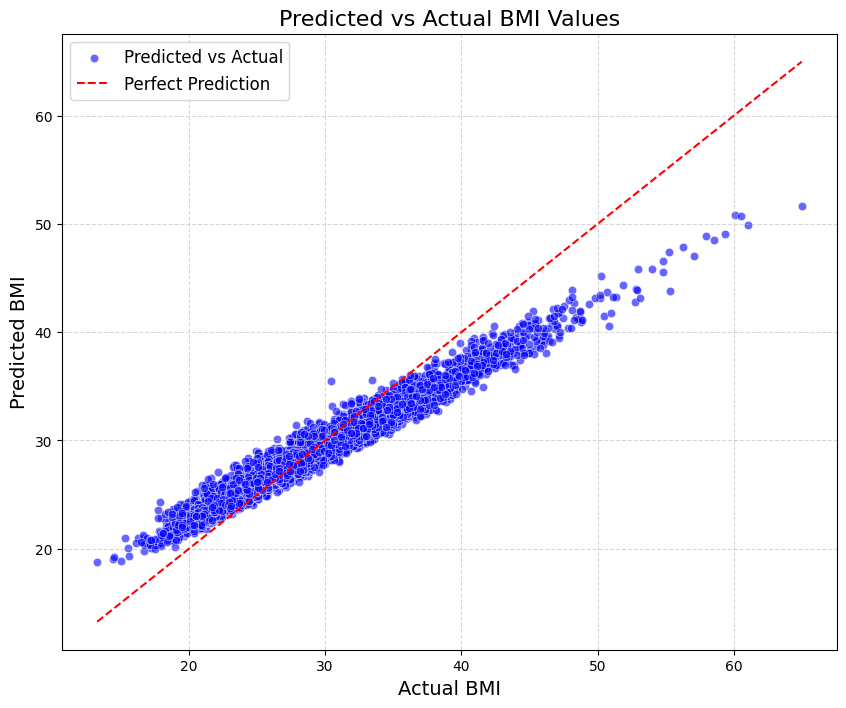

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot of actual vs predicted values
plt.figure(figsize=(10, 8))
sns.scatterplot(x=y_test, y=y_pred, color='blue', alpha=0.6, label='Predicted vs Actual')

# Add a perfect prediction line (diagonal line)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Perfect Prediction')

# Labels and title
plt.title('Predicted vs Actual BMI Values', fontsize=16)
plt.xlabel('Actual BMI', fontsize=14)
plt.ylabel('Predicted BMI', fontsize=14)
plt.legend(fontsize=12)
plt.grid(visible=True, linestyle='--', alpha=0.5)

# Show the plot
plt.show()


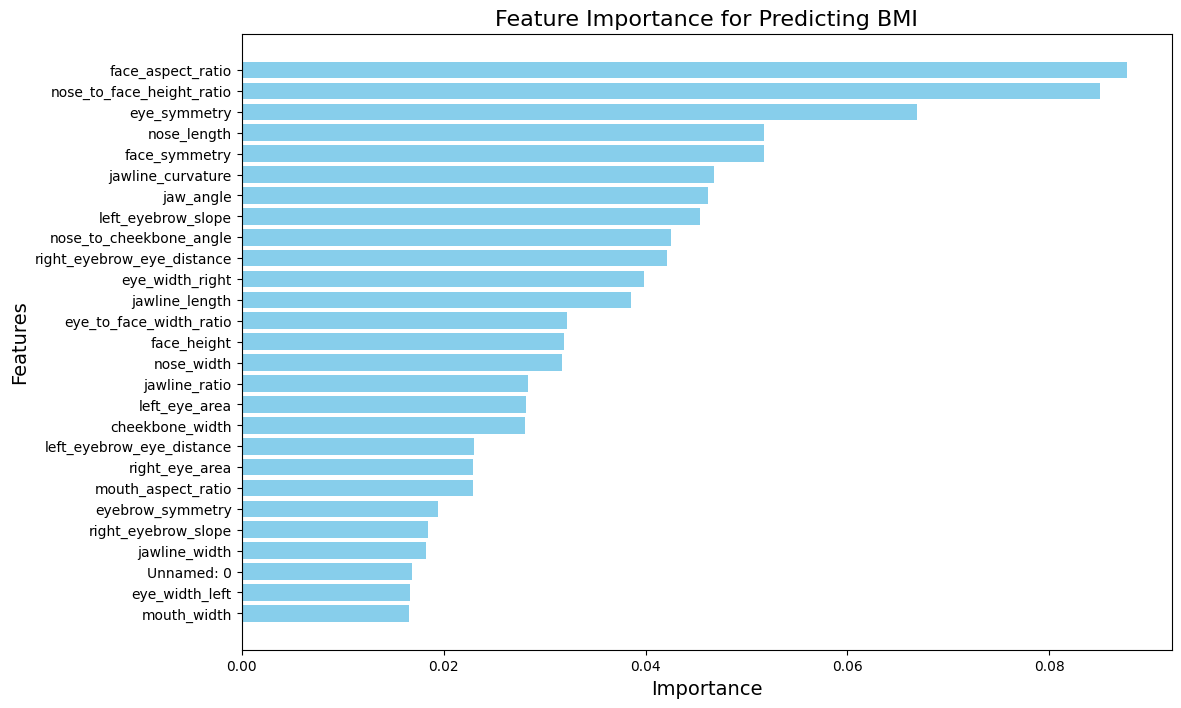

In [17]:
importances = best_model.feature_importances_
features = data.drop(columns=['BMI']).columns
sorted_indices = importances.argsort()

plt.figure(figsize=(12, 8))
plt.barh(features[sorted_indices], importances[sorted_indices], color='skyblue')
plt.title('Feature Importance for Predicting BMI', fontsize=16)
plt.xlabel('Importance', fontsize=14)
plt.ylabel('Features', fontsize=14)
plt.show()


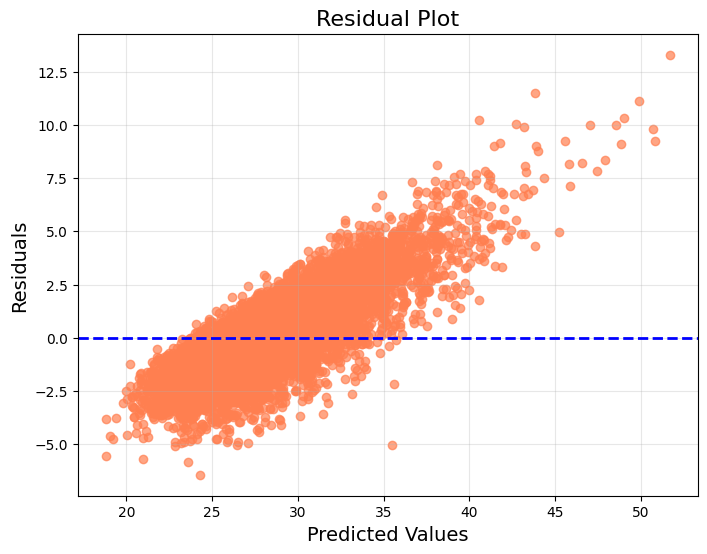

In [18]:
residuals = y_test - y_pred

plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals, alpha=0.7, color='coral')
plt.axhline(y=0, color='blue', linestyle='--', linewidth=2)
plt.title('Residual Plot', fontsize=16)
plt.xlabel('Predicted Values', fontsize=14)
plt.ylabel('Residuals', fontsize=14)
plt.grid(alpha=0.3)
plt.show()


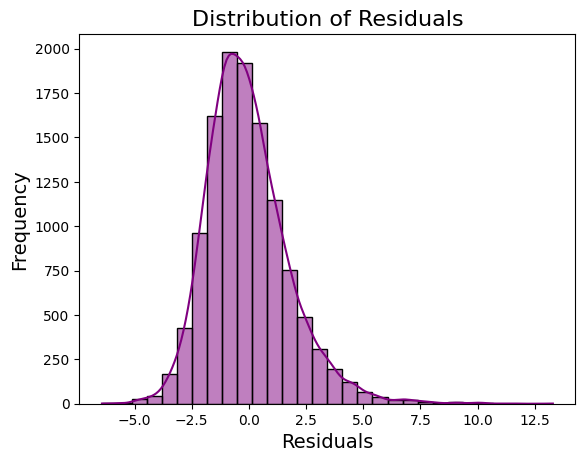

In [19]:
sns.histplot(residuals, kde=True, color='purple', bins=30)
plt.title('Distribution of Residuals', fontsize=16)
plt.xlabel('Residuals', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.show()


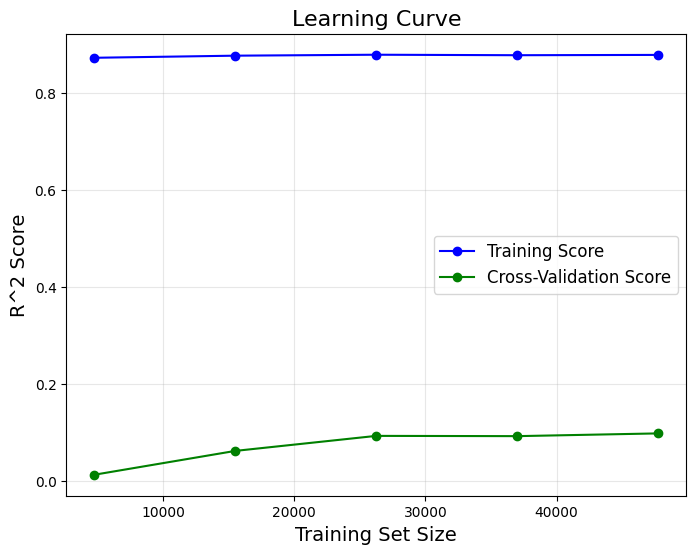

In [20]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(best_model, X, y, cv=5, scoring='r2', n_jobs=-1)

train_scores_mean = train_scores.mean(axis=1)
test_scores_mean = test_scores.mean(axis=1)

plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_scores_mean, 'o-', color='blue', label='Training Score')
plt.plot(train_sizes, test_scores_mean, 'o-', color='green', label='Cross-Validation Score')
plt.title('Learning Curve', fontsize=16)
plt.xlabel('Training Set Size', fontsize=14)
plt.ylabel('R^2 Score', fontsize=14)
plt.legend(fontsize=12)
plt.grid(alpha=0.3)
plt.show()


                Metric     Value
0                  R^2  0.878041
1                  MAE  1.380955
2                  MSE  3.268994
3  Pearson Coefficient  0.979896


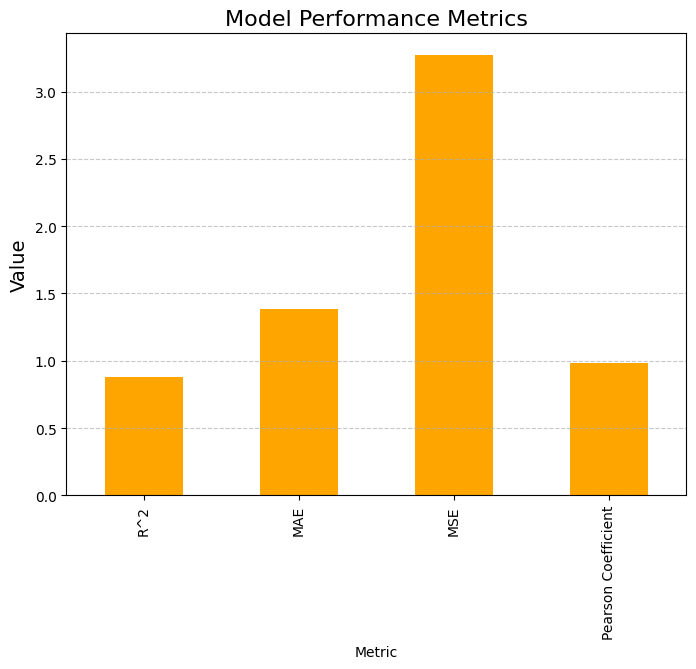

In [21]:
import pandas as pd

metrics = {
    "Metric": ["R^2", "MAE", "MSE", "Pearson Coefficient"],
    "Value": [r2, mae, mse, pearson_corr]
}

metrics_df = pd.DataFrame(metrics)
print(metrics_df)

# Optionally, visualize the metrics
metrics_df.plot(x="Metric", y="Value", kind="bar", legend=False, figsize=(8, 6), color='orange')
plt.title('Model Performance Metrics', fontsize=16)
plt.ylabel('Value', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
